In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [3]:

def split_data(source,ratio):
    data=load_data(source)
    
    

In [2]:
source="C:\\Users\\Sathya Sai\\Downloads\\Bengaluru_House_Data.csv"
#f=load_data(source)

In [3]:
def load_data(source,split_ratio):
    data=[]
    with open(source,'r+') as file:
        data=file.readlines()
    dictlist=[]
    header=parse_header(data[0])
    for i in data[1:]:
        col=parse_values(i)
        dictionary=create_dict(header,col)
        dictlist.append(dictionary)
    
        
        
        
    

In [4]:
def parse_values(data):
    d=[item for item in data.strip().split(',')]
    return d
def create_dict(header,values):
    dictionary={}
    for i,j in zip(header,values):
        dictionary[i]=j
    return dictionary
def parse_header(headers):
    head=[feature for feature in headers.strip().split(',')]
    return head

In [5]:
data=pd.read_csv(source,header=0)
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# MEMORY_USAGE:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
total_memory=0
for i in data.memory_usage(deep=True):
    total_memory+=i
print("DATA IN MB = "+str(total_memory/(1024*1024)))   

DATA IN MB = 5.224139213562012


In [8]:
data.memory_usage(deep=True)  #in bytes

Index              128
area_type       990186
availability    913451
location        929983
size            835473
society         676416
total_sqft      812590
bath            106560
balcony         106560
price           106560
dtype: int64

In [9]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [10]:
data_b=data.drop(['area_type','availability','balcony','society'],axis='columns')

In [11]:
data_b.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# DATA CLEANING

In [12]:
data_b.isna().any()#---->gives if any columns have NaN values

location       True
size           True
total_sqft    False
bath           True
price         False
dtype: bool

In [13]:
data_b.isnull().sum()#--->No. Of NaN Values in each column

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [14]:
#AS LOCATION HAS ONLY ONE NAN VALUE WE CAN DROP THAT COLUMN
data_b=data_b[data_b["location"].notnull()]

In [15]:
#ALSO ALL Columns ARE NOT MISSING AT RANDOM THEREFORE DROPPING THE NaN Values
data_b=data_b.dropna()

In [16]:
data_b.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
data['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

Text(0, 0.5, 'COUNT')

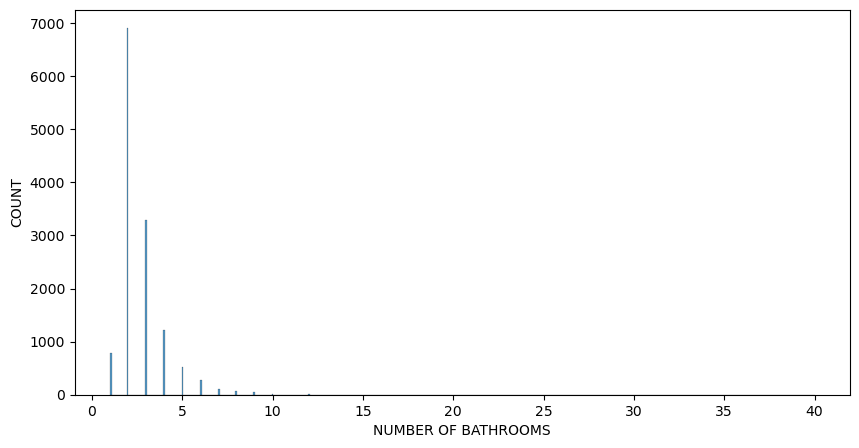

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(data["bath"])
plt.xlabel('NUMBER OF BATHROOMS')
plt.ylabel('COUNT')

In [19]:
data_b

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [20]:
data_b["size"]=data_b["size"].apply(lambda x: int(x.split(' ')[0]))

In [21]:
data_b.sample(n=5,random_state=4)

,location,size,total_sqft,bath,price
12505,Mysore Road,2,1175,2.0,86.68
11712,Ramamurthy Nagar,3,1208,2.0,43.50
5802,Iblur Village,3,2100,4.0,145.00
1807,EPIP Zone,3,2160,4.0,172.00
6040,Haralur Road,2,1243,2.0,46.00


In [22]:
data_b.rename(columns={'size':'bhk'},inplace=True)

In [23]:
data_b#["N_BHK"].unique()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453,4.0,231.00
13316,Richards Town,4,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141,2.0,60.00
13318,Padmanabhanagar,4,4689,4.0,488.00


In [24]:
data_b[data_b.bhk==43] #43 bedrooms in a space of 2400 sqft !LOL  !!!!!!OUTLIER

,location,bhk,total_sqft,bath,price
4684,Munnekollal,43,2400,40.0,660.0


In [25]:
data_b[data_b.bhk==27]

,location,bhk,total_sqft,bath,price
1718,2Electronic City Phase II,27,8000,27.0,230.0


In [26]:
data_b["total_sqft"].unique()#---->'1133 - 1384'error need to be handled

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [27]:
#data_b.total_sqft.dtype#---->OBJECT
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
t=data_b.head()

In [28]:
temp=data_b[~data_b["total_sqft"].apply(is_float)]
temp
#we observe some ranges therefore i am just averaging the range and replace it instead of that data

,location,bhk,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
...,...,...,...,...,...
12975,Whitefield,2,850 - 1060,2.0,38.190
12990,Talaghattapura,3,1804 - 2273,3.0,122.000
13059,Harlur,2,1200 - 1470,2.0,72.760
13265,Hoodi,2,1133 - 1384,2.0,59.135


In [29]:
p=data_b.copy()

In [33]:
p["total_sqft"]=p["total_sqft"].apply(helper)
p.isna().sum()

location       0
bhk            0
total_sqft    46
bath           0
price          0
dtype: int64

In [34]:
index=p[p["total_sqft"].isnull()].index
index

Int64Index([  410,   648,   775,   872,  1019,  1086,  1400,  1712,  1743,
             1821,  2310,  2881,  3228,  3285,  4113,  4293,  5453,  5537,
             5631,  5668,  5708,  5976,  6268,  6303,  6333,  6552,  6592,
             6953,  7001,  7248,  7334,  7520,  7607,  7726,  8273,  9423,
             9519,  9734, 10488, 10491, 11320, 11615, 12186, 12252, 12560,
            12652],
           dtype='int64')

In [35]:
data_b.loc[12186,:]#------------------>after cleaning the data before it is like xxxSq. Meter etc...

location      7th Phase JP Nagar
bhk                            2
total_sqft          120Sq. Yards
bath                         2.0
price                       51.0
Name: 12186, dtype: object

#Object Datatype Handling

In [36]:
def stringcutter(s):
    i=len(s)-1
    while (((s[i]>='A') and (s[i]<='Z')) or ((s[i]>='a') and (s[i]<='z')) or s[i]=='.' or s[i]==' ') and i>=0:
        i-=1
    l=pd.to_numeric(s[0:i+1])
    b=s[i+1:]
    dict={'Guntha':np.NaN,'Sq. Meter':l*10.7639,'Sq. Yards':l*9,'Acres':np.NaN,'Grounds':np.NaN,'Cents':np.NaN,'Perch':np.NaN,'':l}
    return np.round(dict[b],2)
    

In [37]:
data_b.loc[index,"total_sqft"]=data_b.loc[index,"total_sqft"].apply(stringcutter)#---->object

In [38]:
r=stringcutter('600Sq. Meter')
print(r) #==10.7639*600

6458.34


In [39]:
data_b.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [40]:
#we observe some ranges therefore i am just averaging the range and replace it instead of that data
def helper(d):
    if(is_float(d)!=True):
        temp=d.strip().split('-')
        if(len(temp)==2):
            return (float(temp[0])+float(temp[1]))/2
    else:
        return float(d)
    try:
        return float(x)
    except:
        return np.nan

In [41]:
data_b["total_sqft"]=data_b["total_sqft"].apply(helper)

In [42]:
data_b.loc[index,"total_sqft"][0:4]

410      370.92
648         NaN
775    10763.90
872     9900.00
Name: total_sqft, dtype: float64

In [43]:
data_b.dropna(inplace=True) #after data handling the 14 nan values present are removed 

In [44]:
data_b.isna().sum()

location      0
bhk           0
total_sqft    0
bath          0
price         0
dtype: int64

In [45]:
data_b.sample(n=5,random_state=1)

,location,bhk,total_sqft,bath,price
6192,Thanisandra,2,1148.0,2.0,43.50
5769,Old Airport Road,4,2774.0,4.0,208.00
1987,Yelachenahalli,3,1700.0,3.0,130.00
5489,Raja Rajeshwari Nagar,2,1140.0,2.0,49.27
11464,Electronic City,2,1060.0,2.0,55.00


In [46]:
data_b["price_per_sqft"]=(data_b["price"]*100000)/data_b["total_sqft"]

In [47]:
data_b.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


#analysing location column

In [48]:
res=data_b["location"].value_counts()<=10
res

Whitefield                        False
Sarjapur  Road                    False
Electronic City                   False
Kanakpura Road                    False
Thanisandra                       False
                                  ...  
Bapuji Layout                      True
1st Stage Radha Krishna Layout     True
BEML Layout 5th stage              True
Kannur                             True
Abshot Layout                      True
Name: location, Length: 1299, dtype: bool

In [49]:
len(data_b["location"].unique()) ## THIS CREATES DIMENSIONALITY PROBLEM I.E.,DIMENSIONALITY CURSE

1299

In [50]:
data_b["location"].value_counts()

Whitefield                        534
Sarjapur  Road                    392
Electronic City                   302
Kanakpura Road                    264
Thanisandra                       233
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Kannur                              1
Abshot Layout                       1
Name: location, Length: 1299, dtype: int64

In [51]:
def oo(x):
    if(res[x]==False):
        return x
    else:
        return "Others"

In [52]:
#oo('Whitefield')
#print(oo('Whitefield'))-------------->data_b["location"].value_counts()['Whitefield']
#oo('Kannur')
#print(oo('Kannur'))---------------------->data_b["location"].value_counts()['Kannur']

In [53]:
data_b["location"]=data_b["location"].apply(oo)

In [54]:
print("NUMBER OF UNIQUE VALUES AFTER DATA CLEANING  : {}".format(len(data_b["location"].unique())))
#------------------->now the Number of dimensions reduced a lot and 
#--------------------------------------------------->hence solving the problem of dimensionality curse

NUMBER OF UNIQUE VALUES AFTER DATA CLEANING  : 241


In [55]:
#OUTLIER REMOVAL

In [56]:
#average area of one bed room 558.47

In [58]:
data_b=data_b[~((data_b["total_sqft"]/data_b["bhk"])<300)]

In [59]:
data_b["price_per_sqft"].describe()

count     12485.000000
mean       6305.003854
std        4166.940098
min         267.829813
25%        4207.920792
50%        5292.872265
75%        6920.634921
max      176470.588235
Name: price_per_sqft, dtype: float64

In [60]:
def remove_location_outliers(df):
    data_t=pd.DataFrame()
    for key,subdataset in df.groupby('location'):
        m=np.mean(subdataset["price_per_sqft"])
        s=np.std(subdataset["price_per_sqft"])
        reduced=subdataset[(subdataset["price_per_sqft"]<=(m+s)) & (subdataset["price_per_sqft"]>=(m-s))]
        data_t=pd.concat([data_t,reduced],axis=0,ignore_index=True)
    return data_t

In [61]:
data_b=remove_location_outliers(data_b)
len(data_b)

10270

In [62]:
data_b.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Devarachikkanahalli,3,1250.0,2.0,44.0,3520.000000
1,Devarachikkanahalli,2,1250.0,2.0,40.0,3200.000000
2,Devarachikkanahalli,2,1200.0,2.0,83.0,6916.666667
3,Devarachikkanahalli,2,1170.0,2.0,40.0,3418.803419
4,Devarachikkanahalli,3,1425.0,2.0,65.0,4561.403509


In [63]:
'''reduced=pd.DataFrame
reduced=f(data_b)
len(reduced)
#np.mean(reduced["price_per_sqft"])'''

'reduced=pd.DataFrame\nreduced=f(data_b)\nlen(reduced)\n#np.mean(reduced["price_per_sqft"])'

In [64]:
data_b["price_per_sqft"].describe()

count    10270.000000
mean      5659.307184
std       2266.471545
min        876.795163
25%       4244.994224
50%       5175.320376
75%       6428.884529
max      24509.803922
Name: price_per_sqft, dtype: float64

In [65]:
q75=data_b["price_per_sqft"].quantile(0.75)

In [66]:
q25=data_b["price_per_sqft"].quantile(0.25)

In [67]:
IQR=q75-q25
IQR

2183.890304575234

In [68]:
qmin=q25-1.5*IQR
qmin

969.1587672418846

In [69]:
qmax=q75+1.5*IQR
qmax

9704.71998554282

In [70]:
temp=data_b[(data_b["price_per_sqft"]<=qmax) &  (data_b["price_per_sqft"]>=qmin)]

In [71]:
len(data_b[(data_b["price_per_sqft"]<=qmax) &  (data_b["price_per_sqft"]>=qmin)])

9666

In [72]:
temp["price_per_sqft"].describe()

count    9666.000000
mean     5241.317559
std      1447.379924
min      1250.000000
25%      4192.601742
50%      5037.037037
75%      6153.846154
max      9700.000000
Name: price_per_sqft, dtype: float64

<AxesSubplot:>

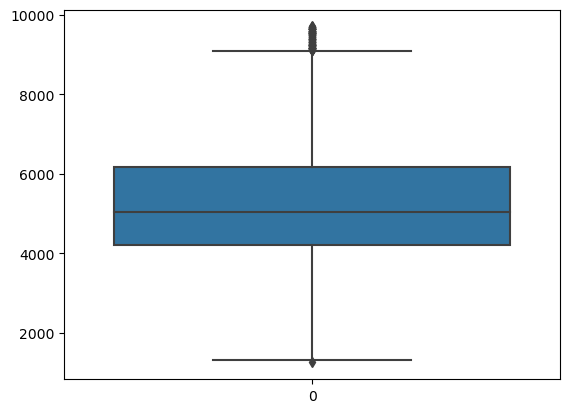

In [73]:
sns.boxplot(data=temp["price_per_sqft"])

In [76]:
def scatter_plot(df,location):
    bhk2=df[(df['location']==location) & (df["bhk"]==2)]
    bhk3=df[(df['location']==location) & (df["bhk"]==3)]
    #matplotlib.rcparams['figure.figsize']=(15,10)
    plt.scatter(bhk2["total_sqft"],bhk2["price_per_sqft"],c='g',marker='+',s=50,label='2_BHK')
    plt.scatter(bhk3["total_sqft"],bhk3["price_per_sqft"],c='r',marker='*',s=50,label='3_BHK')
    plt.title(location)
    plt.xlabel('Total Sqft Area')
    plt.ylabel('Price Per Sqft')
    plt.legend()
    plt.show()

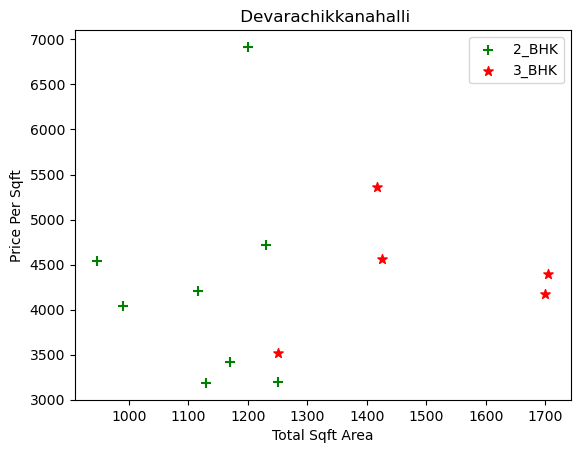

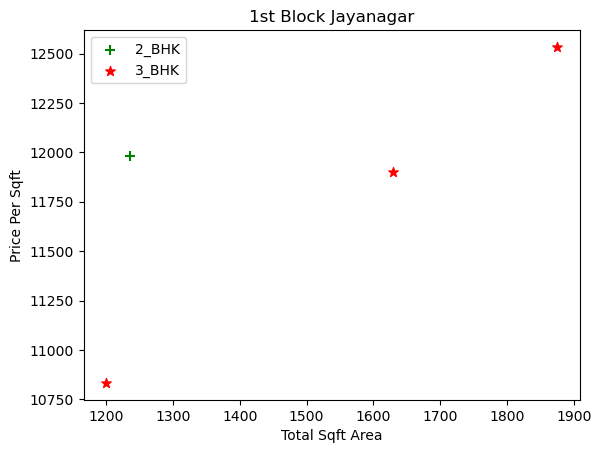

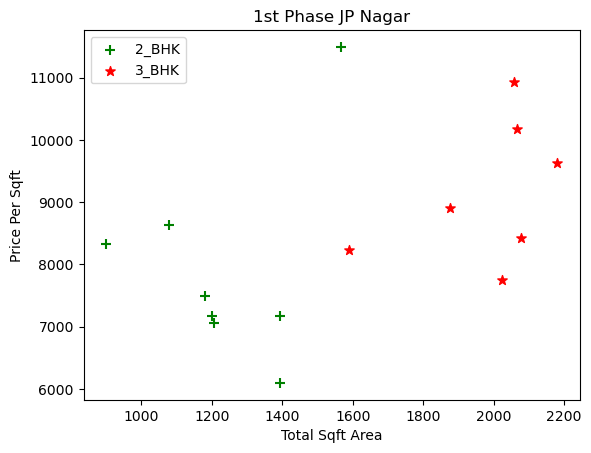

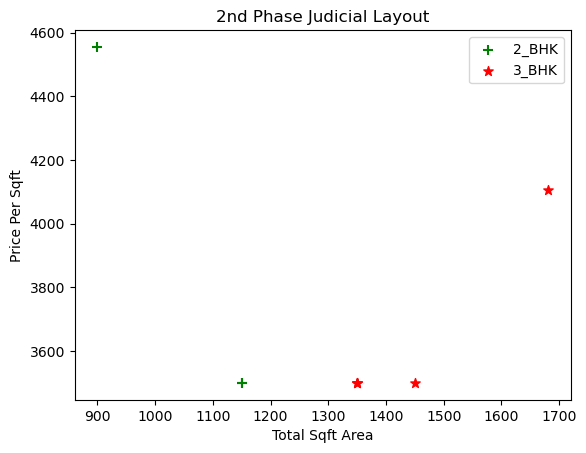

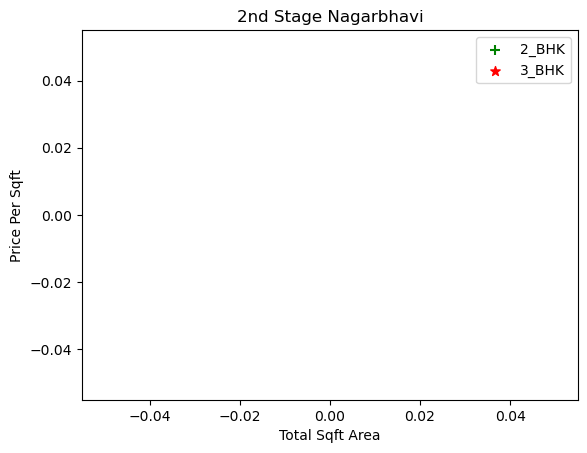

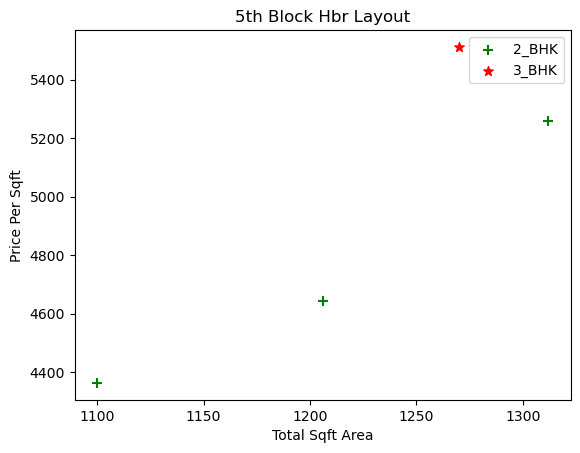

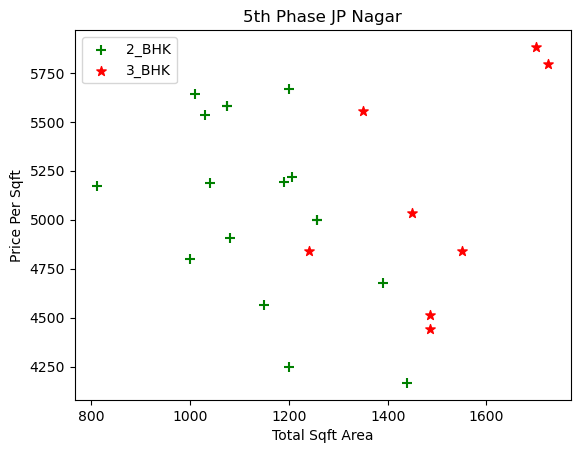

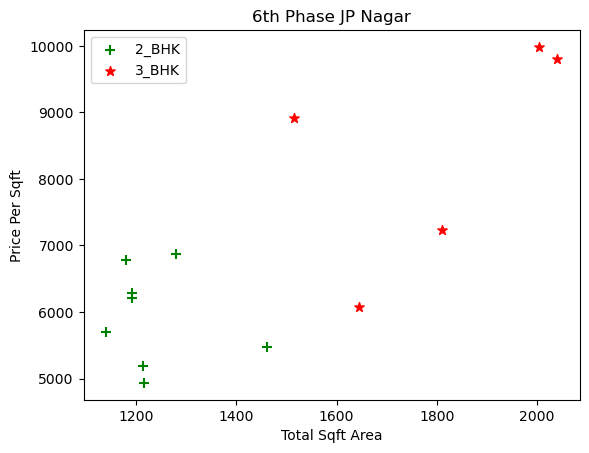

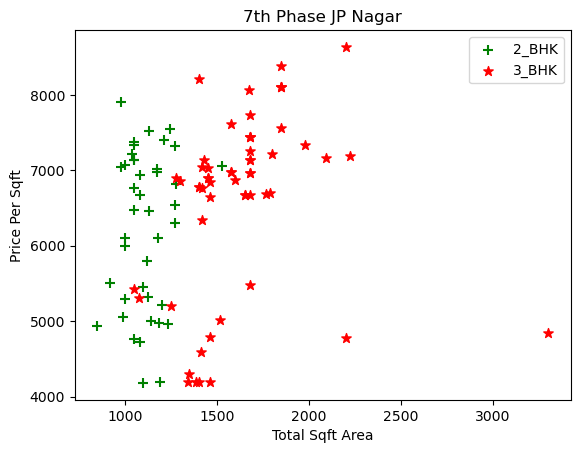

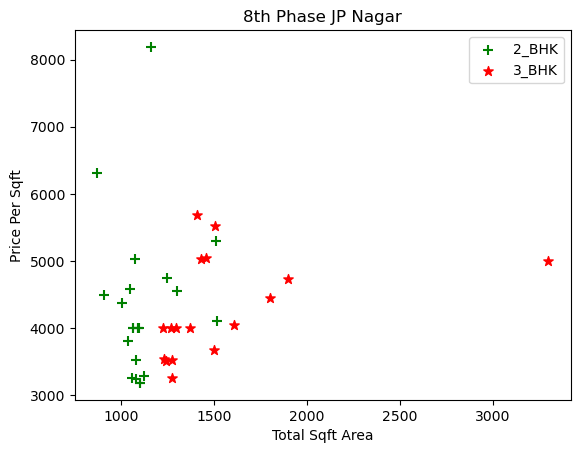

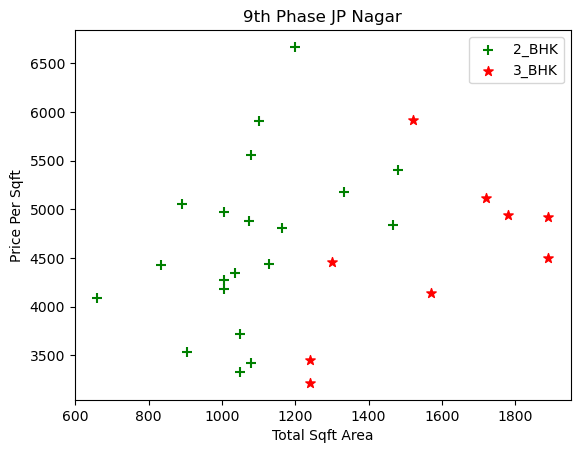

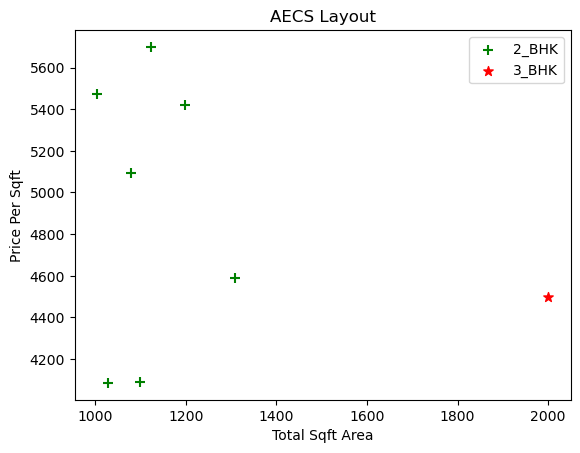

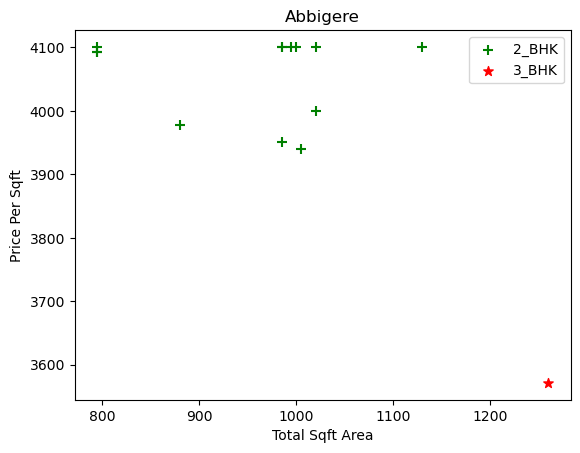

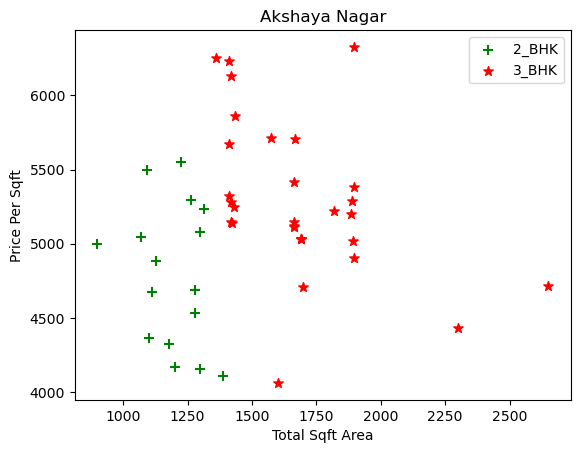

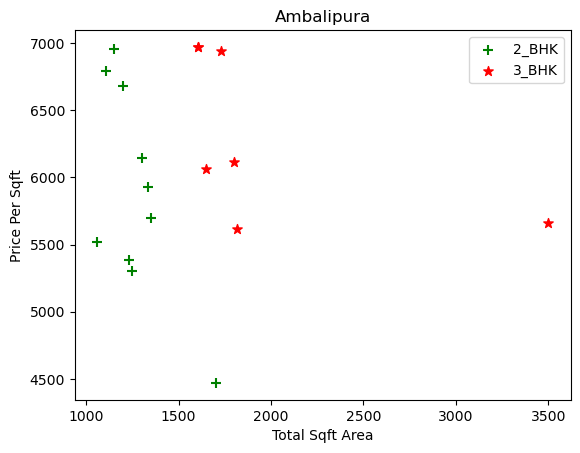

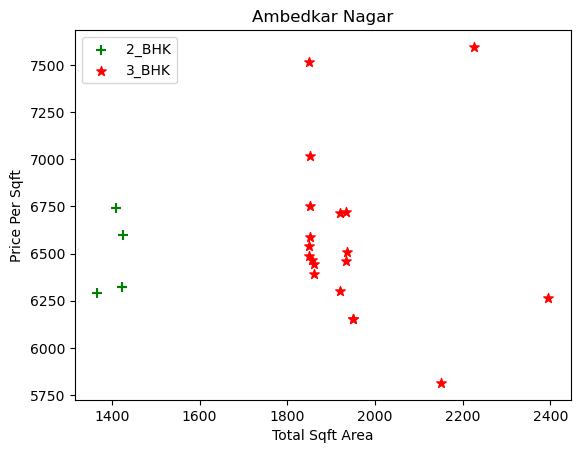

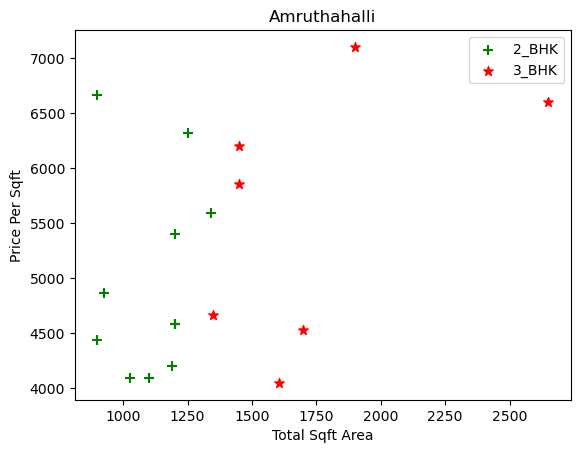

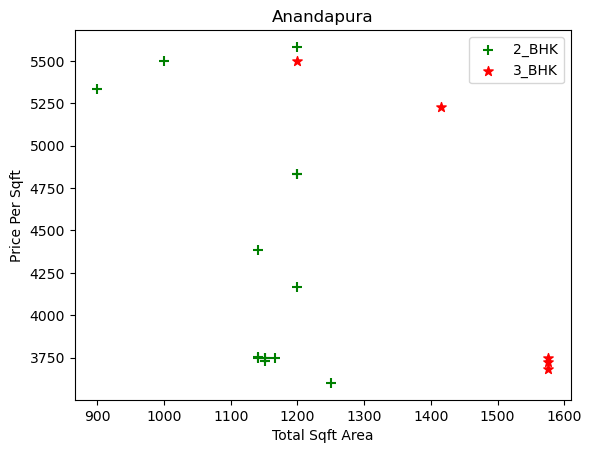

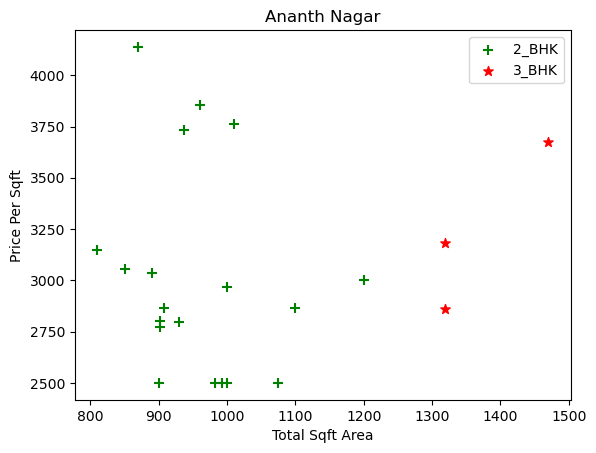

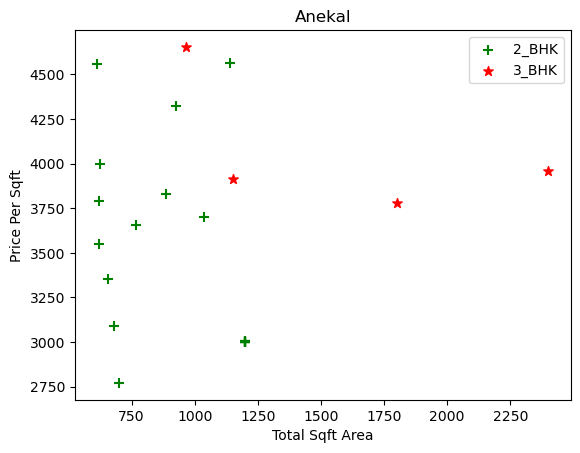

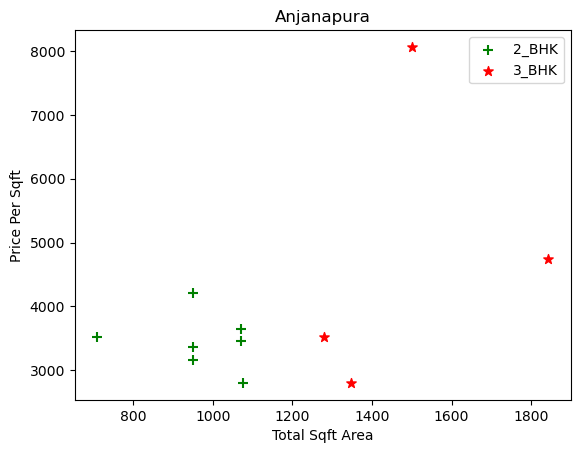

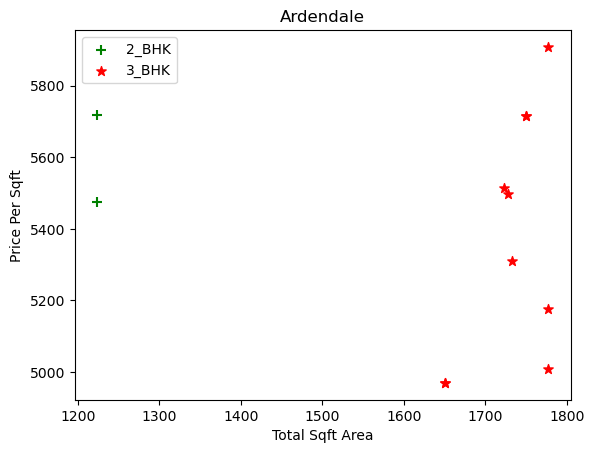

KeyboardInterrupt: 

In [88]:
for i in data_b["location"].unique():
    scatter_plot(data_b,i)

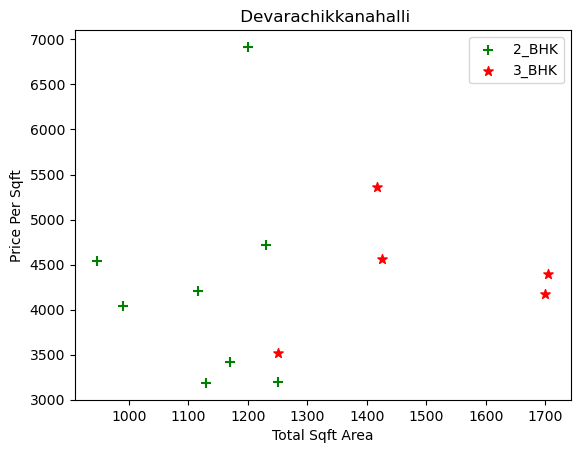

In [77]:
scatter_plot(data_b,location=' Devarachikkanahalli') #TESTING

In [78]:
p="Deva"
bhk2=data_b[data_b.location == 'Rajaji Nagar']# & (data_b["N_BHK"] == 2)]    
bhk3=data_b[(data_b['location']=='Rajaji Nagar') & (data_b["bhk"]==3)]
#rcparams['figure.figsize']=(15,10)
print(bhk2[0:3])
print("\n")
print(bhk3[0:3])

          location  bhk  total_sqft  bath  price  price_per_sqft
8056  Rajaji Nagar    3      1640.0   3.0  229.0    13963.414634
8057  Rajaji Nagar    3      2390.0   3.0  415.0    17364.016736
8058  Rajaji Nagar    3      2390.0   3.0  410.0    17154.811715


          location  bhk  total_sqft  bath  price  price_per_sqft
8056  Rajaji Nagar    3      1640.0   3.0  229.0    13963.414634
8057  Rajaji Nagar    3      2390.0   3.0  415.0    17364.016736
8058  Rajaji Nagar    3      2390.0   3.0  410.0    17154.811715


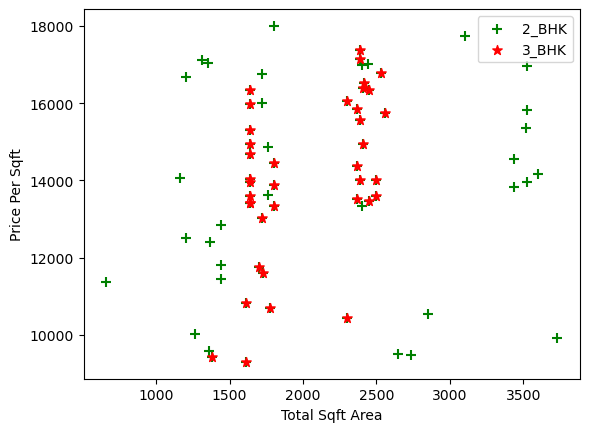

In [79]:
plt.scatter(bhk2["total_sqft"],bhk2["price_per_sqft"],c='g',marker='+',s=50,label='2_BHK')
plt.scatter(bhk3["total_sqft"],bhk3["price_per_sqft"],c='r',marker='*',s=50,label='3_BHK')
#plt.title(location)
plt.xlabel('Total Sqft Area')
plt.ylabel('Price Per Sqft')
plt.legend()
plt.show()

In [80]:
data_b[data_b["location"]==' Devarachikkanahalli']

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Devarachikkanahalli,3,1250.0,2.0,44.0,3520.000000
1,Devarachikkanahalli,2,1250.0,2.0,40.0,3200.000000
2,Devarachikkanahalli,2,1200.0,2.0,83.0,6916.666667
3,Devarachikkanahalli,2,1170.0,2.0,40.0,3418.803419
4,Devarachikkanahalli,3,1425.0,2.0,65.0,4561.403509
5,Devarachikkanahalli,2,947.0,2.0,43.0,4540.654699
6,Devarachikkanahalli,2,1130.0,2.0,36.0,3185.840708
7,Devarachikkanahalli,3,1417.0,2.0,76.0,5363.443896
8,Devarachikkanahalli,2,1230.0,2.0,58.0,4715.447154
9,Devarachikkanahalli,3,1705.0,3.0,75.0,4398.826979


In [81]:
len(data_b["location"].unique())

241

In [84]:
def remove_outliers_in_bhk(df):
    exclude_indices=[]
    for i,subd in df.groupby('location'):
        dict_b={}
        for j,bhk_sub in subd.groupby('bhk'):
            dict_b[j]={
                'count':bhk_sub.shape[0],
                'mean_price':np.mean(bhk_sub["price_per_sqft"]),
                'std':bhk_sub["price_per_sqft"].std()
                }
        for j,subdata in subd.groupby('bhk'):
            bhk=dict_b.get(j-1)#we are deleting from bhk==2 or more
            if ((bhk!=None) and (bhk['count']>5)):
                exclude_indices = np.append(exclude_indices,subdata[subdata["price_per_sqft"]<bhk['mean_price']].index)
    return df.drop(exclude_indices,axis=0)    

In [85]:
d=remove_outliers_in_bhk(data_b)

In [96]:
####------------------->TESTING
exclude_indices=[]
for i,subd in data_b.groupby('location'):
    dict_b={}
    for j,bhk_sub in subd.groupby('N_BHK'):
        dict_b[j]={
            'count':bhk_sub.shape[0],
            'mean_price':np.mean(bhk_sub["price_per_sqft"]),
            'std':bhk_sub["price_per_sqft"].std()
        }
    for j,subdata in subd.groupby('N_BHK'):
        bhk=dict_b.get(j-1)#we are deleting from bhk==2 or more
        if ((bhk!=None) and (bhk['count']>=5)):
            exclude_indices = np.append(exclude_indices,subdata[subdata["price_per_sqft"]<bhk['mean_price']].index)
    print(exclude_indices)
    break

[ 0. 12.]


In [86]:
d

,location,bhk,total_sqft,bath,price,price_per_sqft
1,Devarachikkanahalli,2,1250.0,2.0,40.0,3200.000000
2,Devarachikkanahalli,2,1200.0,2.0,83.0,6916.666667
3,Devarachikkanahalli,2,1170.0,2.0,40.0,3418.803419
4,Devarachikkanahalli,3,1425.0,2.0,65.0,4561.403509
5,Devarachikkanahalli,2,947.0,2.0,43.0,4540.654699
...,...,...,...,...,...,...
10259,Yeshwanthpur,2,1195.0,2.0,100.0,8368.200837
10260,Yeshwanthpur,3,1692.0,3.0,108.0,6382.978723
10262,Yeshwanthpur,6,2500.0,5.0,185.0,7400.000000
10267,Yeshwanthpur,3,1855.0,3.0,135.0,7277.628032


# COMPARISON BEFORE AND AFTER REMOVING OUTLIERS

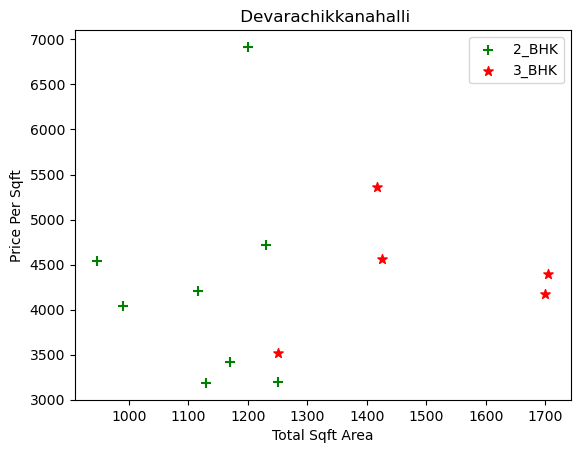

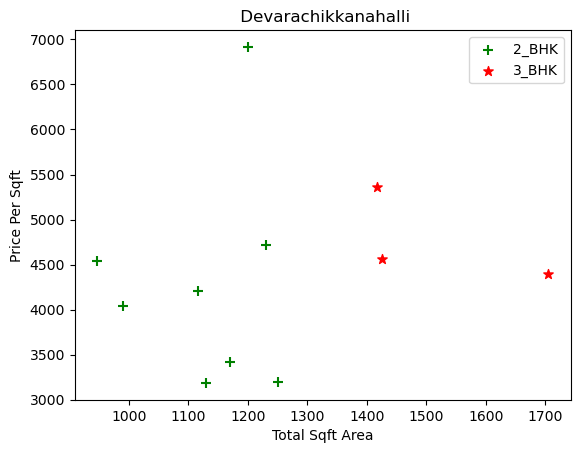

In [87]:
scatter_plot(data_b,location=' Devarachikkanahalli') #TESTING
scatter_plot(d,' Devarachikkanahalli')

In [88]:
data_b=d

In [89]:
data_b

,location,bhk,total_sqft,bath,price,price_per_sqft
1,Devarachikkanahalli,2,1250.0,2.0,40.0,3200.000000
2,Devarachikkanahalli,2,1200.0,2.0,83.0,6916.666667
3,Devarachikkanahalli,2,1170.0,2.0,40.0,3418.803419
4,Devarachikkanahalli,3,1425.0,2.0,65.0,4561.403509
5,Devarachikkanahalli,2,947.0,2.0,43.0,4540.654699
...,...,...,...,...,...,...
10259,Yeshwanthpur,2,1195.0,2.0,100.0,8368.200837
10260,Yeshwanthpur,3,1692.0,3.0,108.0,6382.978723
10262,Yeshwanthpur,6,2500.0,5.0,185.0,7400.000000
10267,Yeshwanthpur,3,1855.0,3.0,135.0,7277.628032


(array([ 294., 3250., 2775.,  553.,  277.,  126.,   40.,   16.,    6.,
           5.]),
 array([  876.79516251,  3240.09603842,  5603.39691432,  7966.69779023,
        10329.99866613, 12693.29954204, 15056.60041794, 17419.90129385,
        19783.20216976, 22146.50304566, 24509.80392157]),
 <BarContainer object of 10 artists>)

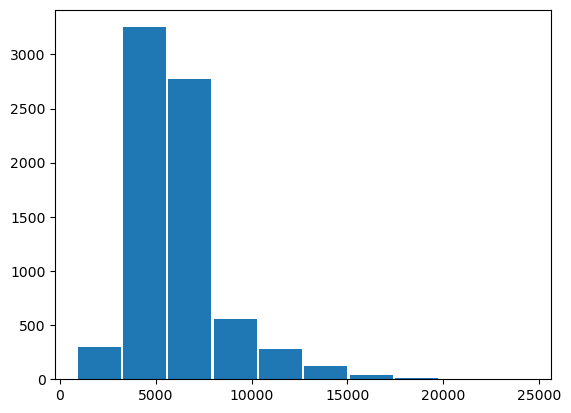

In [90]:
plt.hist(data_b["price_per_sqft"],bins=10,rwidth=0.95) #inference----->right-skewed

(array([1.000e+00, 2.000e+00, 1.100e+01, 3.160e+02, 1.564e+03, 3.031e+03,
        1.738e+03, 4.830e+02, 1.700e+02, 2.600e+01]),
 array([ 6.7762734 ,  7.10932891,  7.44238441,  7.77543992,  8.10849543,
         8.44155094,  8.77460645,  9.10766195,  9.44071746,  9.77377297,
        10.10682848]),
 <BarContainer object of 10 artists>)

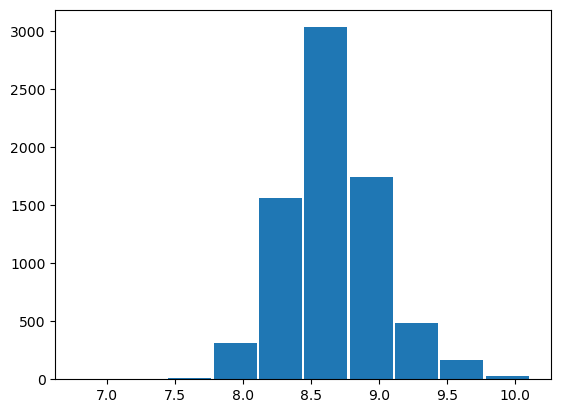

In [91]:
plt.hist(np.log(data_b["price_per_sqft"]),bins=10,rwidth=0.95) #transforming into NORMAL Distribution

(array([4.774e+03, 1.768e+03, 6.780e+02, 8.100e+01, 2.900e+01, 7.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

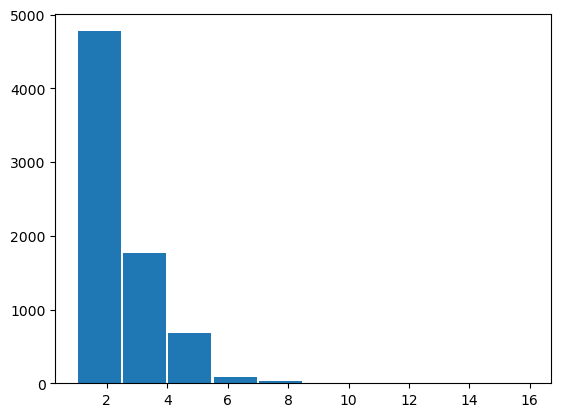

In [92]:
plt.hist(data_b["bath"],bins=10,rwidth=0.95)

In [93]:
data_b["bath"].unique() #having 13,16 bathrooms looks unobvious

array([ 2.,  3.,  4.,  5.,  1.,  8.,  6.,  7.,  9., 12., 16., 13.])

In [94]:
data_b[(data_b["bath"]>=10) & (data_b["bath"]<=16)]
#12 bathrooms in 4000 sqft is a flaw.
#we need to handle these.

,location,bhk,total_sqft,bath,price,price_per_sqft
5283,Neeladri Nagar,10,4000.0,12.0,160.0,4000.000000
5938,Others,10,12000.0,12.0,525.0,4375.000000
6027,Others,16,10000.0,16.0,550.0,5500.000000
6769,Others,11,6000.0,12.0,150.0,2500.000000
7102,Others,13,5425.0,13.0,275.0,5069.124424


In [95]:
def outlier_bath_rooms(df):
    return df[df["bath"]<(df["bhk"]+2)]
#1 bathroom for each bedroom and 1 extra atmost

In [96]:
data_b=outlier_bath_rooms(data_b)

In [97]:
len(data_b)

7264

In [98]:
data_b[data_b["bath"]>(data_b["bhk"]+2)] #Hence Cleaned.

,location,bhk,total_sqft,bath,price,price_per_sqft


In [101]:
temp=pd.get_dummies(data_b["location"],drop_first=True)

In [104]:
data_b=pd.concat([data_b,temp],axis=1)

In [110]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [111]:
le=LabelEncoder()
oe=OneHotEncoder()

In [112]:
b=pd.DataFrame()

In [113]:
b["t"]=data_b["location"]

In [112]:
b["t"]=pd.DataFrame(le.fit_transform(data_b["location"]))

In [118]:
b.index#b=oe.fit_transform(data_b["location"]).toarray()

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            10247, 10248, 10249, 10254, 10256, 10259, 10260, 10262, 10267,
            10268],
           dtype='int64', length=7264)

In [106]:
oe.fit(b)#.categories_

OneHotEncoder()

In [114]:
k=pd.DataFrame(oe.fit_transform(b).toarray(),index=b.index)

In [115]:
l=oe.categories_

In [116]:
l[0][24]

'BEML Layout'

In [117]:
for i in range(241):
    k.rename(columns={i:l[0][i]},inplace=True)

In [118]:
data_b=pd.concat([data_b,k],axis=1)

In [119]:
k.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            10247, 10248, 10249, 10254, 10256, 10259, 10260, 10262, 10267,
            10268],
           dtype='int64', length=7264)

In [105]:
t=data_b.drop(['price_per_sqft'],axis=1,inplace=True)

##-------------------------> Dropping one column from to avoid MULTICOLLINEARITY Problem  <--------------------------##


In [106]:
data_b.head(n=5)

,location,bhk,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,2,1250.0,2.0,40.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,2,1200.0,2.0,83.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,2,1170.0,2.0,40.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,3,1425.0,2.0,65.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,2,947.0,2.0,43.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
@app.route('/predict_home_price',methods=['POST'])
def predict_home_price():
    total_sqft=float(request.form['total_sqft'])
    location=request.form['location']
    N_BHK=int(request.form['N_BHK'])
    bath= int(request.form['N_BHK'])

    response=jsonify({
        'estimated_price':util.get_estimated_price(location,N_BHK,total_sqft,bath)
    })

    response.headers.add('Access-Control-Allow-Origin', '*')
    return response



In [107]:
y=data_b["price"]
x=data_b.drop('price',axis=1)

In [108]:
x=x.drop('location',axis=1)

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [111]:
print("total size: {}".format(len(data_b)))
print("train size: {}".format(len(x_train)))
print("test size: {} ".format(len(y_test)))

total size: 7264
train size: 5811
test size: 1453 


In [127]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [128]:
model.fit(x_train,x_test)

LinearRegression()

In [129]:
model.score(y_train,y_test)

0.8032747864642041

In [115]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.79544326, 0.80775138, 0.81322161, 0.76762882, 0.82079395])

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [117]:
def finding_best_model(x,y):
    Algorithms={
        'DecisionTree_Regressor':{
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' :['squared_error','friedman_mse'],#,'poisson'],
                'splitter' :['random','best'],
                'random_state':[None,10],
                'max_features':['auto','sqrt','log2']
            }
        },
        'XGB_Regressor':{
            'model':XGBRegressor(),
            'params':{
                'loss':['squared_error','huber','quantile'],
                'criterion':['friedman_mse']
                
            }
        },
        'Lasso_regression':{
            'model':Lasso(),
            'params':{
                'selection':['cyclic', 'random'],
                'alpha':[1,2,3],
                'tol':[0.0004]
            }
        },
        'Ridge_regression':{
            
            'model':Ridge(),
            'params':{
                'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga'],
                'alpha':[1,2]
            }
        },
        'RandomForest_Regressor':{
            'model':RandomForestRegressor(),
            'params':{
                'n_estimators':[100,125,150],
                'criterion':['squared_error','friedman_mse'],
                'min_samples_split':[2,4]
                
            }   
        },
        'linear_regression' : {
            
            'model': LinearRegression(),##Pipeline([('preprocessor',StandardScaler()),('estimator',LinearRegression())]),#Pipeline([(StandardScaler),(LinearRegression()),
            'params':{}
        }
    }
    bs=" "
    scores=[]
    #df=pd.DataFrame()
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)
    for algo,parameters in Algorithms.items() :
        gcv=GridSearchCV(parameters['model'],parameters['params'],cv=cv,return_train_score=False)
        gcv.fit(x,y)
        scores.append({
            'model_name':algo,
            'best_score':gcv.best_score_,
            'best_params':gcv.best_params_
        })
        bs=gcv.best_estimator_
        #df=pd.concat([df,gcv.cv_results_],axis=0)
    print("Best_Estimator : {}".format(bs))
    return pd.DataFrame(scores,columns=['model_name','best_score','best_params'])

In [118]:
d_b=finding_best_model(x_train,x_test)

[09:41:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion", "loss" } are not used.

[09:41:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion", "loss" } are not used.

[09:41:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion", "loss" } are not used.

[09:41:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion", "loss" } are not used.

[09:41:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "c

In [ ]:
b=

In [184]:
d_b

,model_name,best_score,best_params,test_score
0,DecisionTree_Regressor,0.758448,"{'criterion': 'friedman_mse', 'max_features': ...",0.830475
1,XGB_Regressor,0.684126,"{'criterion': 'friedman_mse', 'loss': 'squared...",0.881642
2,Lasso_regression,0.501145,"{'alpha': 3, 'selection': 'random', 'tol': 0.0...",0.653527
3,Ridge_regression,0.650257,"{'alpha': 1, 'solver': 'auto'}",0.807438
4,RandomForest_Regressor,0.718393,"{'criterion': 'squared_error', 'min_samples_sp...",0.852318
5,linear_regression,0.652007,{},0.803275


In [174]:
a= DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt', random_state=10, splitter= 'best')

In [175]:
a.fit(x_train,x_test)

DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      random_state=10)

In [177]:
a.score(y_train,y_test)

0.8304752948882247

#######################----BUT RANDOMFOREST IS COSTLY AND HOWEVER THERE ISN'T MUCH IMPROVEMENT IN SCORE WE ARE GOING WITH MULTIVARIATE REGRESSION ONLY----------#################

In [191]:
def predict_target(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    p=np.zeros(len(x.columns))
    p[0]=bhk
    p[1]=sqft
    p[2]=bath
    if loc_index >= 0:
        p[loc_index]=1
    print(model.predict([p])[0])

In [192]:
predict_target('1st Phase JP Nagar',1000,2,2)

84.20182522240287


C:\Users\Sathya Sai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
Best_Estimator : DecisionTreeRegressor({'criterion': 'friedman_mse', 'max_features': 'sqrt', 'random_state': 10, 'splitter': 'best'})#---------->(0.8304752948882247)


Best_Estimator : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, criterion='friedman_mse',
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None,
             loss='squared_error', max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)#------------------------------------>(0.8816423807527688)

Best_Estimator : Lasso(alpha=3, selection='random', tol=0.0004)#------------>(0.6535273594270129)
    
Best_Estimator : Ridge(alpha=1)#------------->(0.8074377823144514)

Best_Estimator : LinearRegression()#--------->(0.8032747864642041)

Best_Estimator : RandomForestRegressor(criterion='friedman_mse', min_samples_split=4,
                      n_estimators=150)#---------------->(0.8523184221566867)


In [ ]:

        'DecisionTree_Regressor':{
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' :['squared_error','friedman_mse'],#,'poisson'],
                'splitter' :['random','best'],
                'random_state':[None,10],
                'max_features':['auto','sqrt','log2']
            }
        },
        
        'XGB_Regressor':{
            'model':XGBRegressor(),
            'params':{
                'loss':['squared_error','huber','quantile'],
                'criterion':['friedman_mse']
                
            }
        },
       
        'Lasso_regression':{
            'model':Lasso(),
            'params':{
                'selection':['cyclic', 'random'],
                'alpha':[1,2,3],
                'tol':[0.0004]
            }
        },
        'Ridge_regression':{
            
            'model':Ridge(),
            'params':{
                'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga'],
                'alpha':[1,2]
            }
        },
        
         'RandomForest_Regressor':{
            'model':RandomForestRegressor(),
            'params':{
                'n_estimators':[100,125,150],
                'criterion':['squared_error','friedman_mse'],
                'min_samples_split':[2,4]
                
            }
            
        },
        
            'linear_regression' : {
            'model': LinearRegression(),##Pipeline([('preprocessor',StandardScaler()),('estimator',LinearRegression())]),#Pipeline([(StandardScaler),(LinearRegression()),
            'params':{}
        },
                

In [152]:
d=Pipeline([('preprocessor',StandardScaler()),('estimator',LinearRegression())])

In [178]:
def predict_target(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    p=np.zeros(len(x.columns))
    p[0]=bhk
    p[1]=sqft
    p[2]=bath
    if loc_index >= 0:
        p[loc_index]=1
    print(model.predict([p])[0])

In [150]:
a=np.where(x.columns==' Devarachikkanahalli')[0]

array([3], dtype=int64)

In [158]:
a

array([3], dtype=int64)

In [183]:
predict_target('Indira Nagar',1000,2,2)

81.57665088615089


C:\Users\Sathya Sai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [193]:
import pickle
import json

In [197]:
with open('bangalore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

In [198]:
columns={
    'data_columns':[col.lower() for col in x.columns]
}
with open('columns.json','w') as file:
    file.write(json.dumps(columns))

In [196]:
len(columns['data_columns'])

243